# Problem Statement
A key challenge for the insurance industry is to charge each customer an appropriate premium for the risk they represent. The ability to predict a correct claim amount has a significant impact on insurer's management decisions and financial statements. Predicting the cost of claims in an insurance company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of claims based on health factors like BMI, age, smoker, health conditions and others. Insurance companies apply numerous techniques for analyzing and predicting health insurance costs

# Data Definition

**age** : Age of the policyholder (Numeric)

**sex:** Gender of policyholder (Categoric)

**weight:** Weight of the policyholder (Numeric)

**bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight (Numeric)

**no_of_dependents:** Number of dependent persons on the policyholder (Numeric)

**smoker:** Indicates policyholder is a smoker or a non-smoker (non-smoker=0;smoker=1) (Categoric)

**claim:** The amount claimed by the policyholder (Numeric)

**bloodpressure:** Bloodpressure reading of policyholder (Numeric)

**diabetes:** Indicates policyholder suffers from diabetes or not (non-diabetic=0; diabetic=1) (Categoric)

**regular_ex:** A policyholder regularly excercises or not (no-excercise=0; excercise=1) (Categoric)

**job_title:** Job profile of the policyholder (Categoric)

**city:** The city in which the policyholder resides (Categoric)

**hereditary_diseases:**  A policyholder suffering from a hereditary diseases or not (Categoric)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./Dataset/healthinsurance.csv')

In [3]:
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [4]:
#Checking the data types
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                   int64
city                    object
bloodpressure            int64
diabetes                 int64
regular_ex               int64
job_title               object
claim                  float64
dtype: object

In [5]:
#Converting numerical variables to categorical
df['smoker']= df['smoker'].astype('object')
df['diabetes']= df['diabetes'].astype('object')
df['regular_ex']= df['regular_ex'].astype('object')

In [6]:
#Validating the data types after conversion
df.dtypes

age                    float64
sex                     object
weight                   int64
bmi                    float64
hereditary_diseases     object
no_of_dependents         int64
smoker                  object
city                    object
bloodpressure            int64
diabetes                object
regular_ex              object
job_title               object
claim                  float64
dtype: object

In [7]:
#5 Number Summary EDA
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,14604.0,39.547521,14.015966,18.0,27.0,40.00,52.000,64.0
weight,15000.0,64.909600,13.701935,34.0,54.0,63.00,76.000,95.0
bmi,14044.0,30.266413,6.122950,16.0,25.7,29.40,34.400,53.1
no_of_dependents,15000.0,1.129733,1.228469,0.0,0.0,1.00,2.000,5.0
bloodpressure,15000.0,68.650133,19.418515,0.0,64.0,71.00,80.000,122.0
claim,15000.0,13401.437620,12148.239619,1121.9,4846.9,9545.65,16519.125,63770.4


<Axes: xlabel='bloodpressure'>

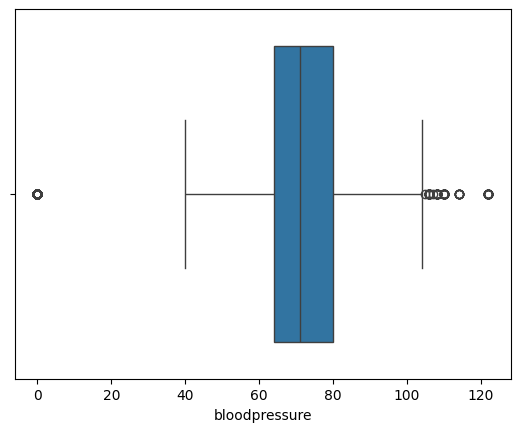

In [8]:
# Bloodpressure has minimum value as 0, which can be an outlier on minimum side
# Taking a deep dive, the median > mean and more data points are beyond median(mode)
# It is left or negative skewed as most of the frequency of datapoints is towards right
sns.boxplot(df['bloodpressure'], orient='h')

In [9]:
#Checking missing values
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [10]:
# age and bmi has missing values, which needs to be imputed

<Axes: xlabel='age'>

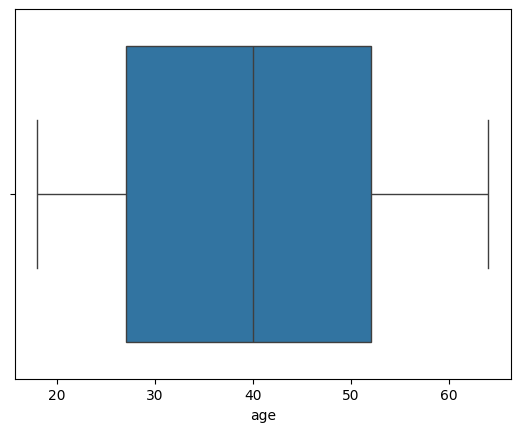

In [11]:
# Checking the distribution of age 
sns.boxplot(df['age'],orient='h')

In [12]:
# Data points for age variable look normally distributed, 
# therefore we impute the missing values for age variable by mean

<Axes: xlabel='bmi'>

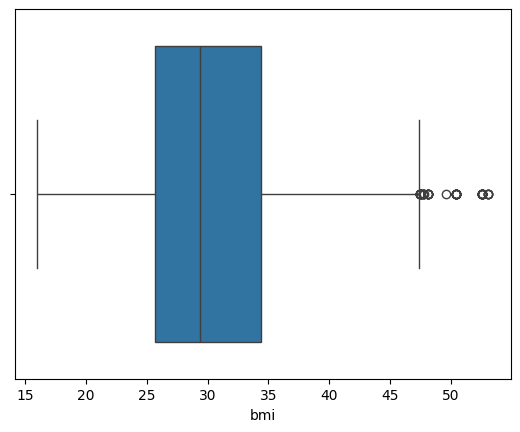

In [13]:
# Checking the distribution of bmi
sns.boxplot(df['bmi'],orient='h')

In [14]:
# Data points for age variable don't look normally distributed, 
# therefore we impute the missing values for age variable by median

In [15]:
# Missing Values Treatment
df['age'].replace(to_replace=np.nan, value=df['age'].mean(), inplace=True)
df['bmi'].replace(to_replace=np.nan, value=df['bmi'].median(), inplace=True)

/var/folders/ts/t0y8j7tn61v2qmfqjwmswtmm0000gn/T/ipykernel_10518/4222645037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(to_replace=np.nan, value=df['age'].mean(), inplace=True)
/var/folders/ts/t0y8j7tn61v2qmfqjwmswtmm0000gn/T/ipykernel_10518/4222645037.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [16]:
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [17]:
# Outliers treatment for bloodpressure variable by replacing 0 to median (to bring the values in IQR)
df['bloodpressure'] = df['bloodpressure'].replace(0,df['bloodpressure'].median())


In [18]:
df['city'].nunique()

91

In [19]:
# There are 91 categories for city variable
# Replacing the 91 categories West, Mid-West, North-East & Southern Region


In [20]:
# create a region column and combine the north-east cities
df['region'] = df['city'].replace(['NewYork', 'Boston', 'Phildelphia', 'Pittsburg', 'Buffalo',
                                                       'AtlanticCity','Portland', 'Cambridge', 'Hartford', 
                                                       'Springfield', 'Syracuse', 'Baltimore', 'York', 'Trenton',
                                                       'Warwick', 'WashingtonDC', 'Providence', 'Harrisburg',
                                                       'Newport', 'Stamford', 'Worcester'],
                                                      'North-East')

In [21]:
# combine all the southern cities into the 'region' column
df['region'] = df['region'].replace(['Atlanta', 'Brimingham', 'Charleston', 'Charlotte',
                                                         'Louisville', 'Memphis', 'Nashville', 'NewOrleans',
                                                         'Raleigh', 'Houston', 'Georgia', 'Oklahoma', 'Orlando',
                                                         'Macon', 'Huntsville', 'Knoxville', 'Florence', 'Miami',
                                                         'Tampa', 'PanamaCity', 'Kingsport', 'Marshall'],
                                                         'Southern')

In [22]:
# combine all the mid-west cities into the 'region' column
df['region'] = df['region'].replace(['Mandan', 'Waterloo', 'IowaCity', 'Columbia',
                                                         'Indianapolis', 'Cincinnati', 'Bloomington', 'Salina',
                                                         'KanasCity', 'Brookings', 'Minot', 'Chicago', 'Lincoln',
                                                         'FallsCity', 'GrandForks', 'Fargo', 'Cleveland', 
                                                         'Canton', 'Columbus', 'Rochester', 'Minneapolis', 
                                                         'JeffersonCity', 'Escabana','Youngstown'],
                                                         'Mid-West')

In [23]:
# combine all the western cities into the 'region' column
df['region'] = df['region'].replace(['SantaRosa', 'Eureka', 'SanFrancisco', 'SanJose',
                                                         'LosAngeles', 'Oxnard', 'SanDeigo', 'Oceanside', 
                                                         'Carlsbad', 'Montrose', 'Prescott', 'Fresno', 'Reno',
                                                         'LasVegas', 'Tucson', 'SanLuis', 'Denver', 'Kingman',
                                                         'Bakersfield', 'Mexicali', 'SilverCity', 'Pheonix',
                                                         'SantaFe', 'Lovelock'],
                                                         'West')

In [24]:
df['region'].nunique()

4

In [25]:
# Segregating numerical and categorical variables to prepare for one-hot encoding
df_num = df.select_dtypes(include = [np.number])
df_cat = df.select_dtypes(include = [object])
df_cat.drop('city', axis=1, inplace=True)

In [26]:
# Dummy One hot encoding for Categorical variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

In [27]:
dummy_var.head()

,sex_male,hereditary_diseases_Arthritis,hereditary_diseases_Cancer,hereditary_diseases_Diabetes,hereditary_diseases_Epilepsy,hereditary_diseases_EyeDisease,hereditary_diseases_HeartDisease,hereditary_diseases_High BP,hereditary_diseases_NoDisease,hereditary_diseases_Obesity,...,job_title_Manager,job_title_Photographer,job_title_Police,job_title_Politician,job_title_Singer,job_title_Student,job_title_Technician,region_North-East,region_Southern,region_West
0,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [28]:
# Dropping the target column claim
df_target = np.log(df_num['claim'])
df_num = df_num.drop('claim', axis = 1)

In [29]:
# Scaling the numerical varaibles for Standardization
# Instantiate Standard Scaler 
X_scaler = StandardScaler()
# Scaling numerical variables
df_num_scaled = X_scaler.fit_transform(df_num)


In [30]:
# Standardize and prepare the target variable 
# Standardization of the target variable
# z = x-mu/sigma 
y = (df_target - df_target.mean())/df_target.std()

In [31]:
print("Checking the Data Type of Scaled Numerical Variable and Dummy Variable")
print(type(df_num_scaled))
print(type(dummy_var))
print("Converting anf Validating the Data Type of Scaled Numerical Variable and Dummy Variable")
df_num_scaled = pd.DataFrame(df_num_scaled)
print(type(df_num_scaled))
print(type(dummy_var))

# Prepare dependent variable
X = pd.concat([df_num_scaled, dummy_var], axis=1)

Checking the Data Type of Scaled Numerical Variable and Dummy Variable
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
Converting anf Validating the Data Type of Scaled Numerical Variable and Dummy Variable
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [33]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10, test_size=0.3)

In [ ]:
# Get RMSE for train set
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return rmse_train

In [ ]:
# Get RMSE for test set
def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test))
    return rmse_test

In [34]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model): 
    test_pred = model.predict(X_test)

    mape_test = mape(y_test, test_pred)

    return(mape_test)